# LOAD THE DATA

In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Netflix_Dataset_Movie.csv', low_memory=False)

In [4]:
df.head()

,Movie_ID,Year,Name,User_ID,Rating,Movie_ID.1
0,1.0,2003.0,Dinosaur Planet,712664,5,3
1,2.0,2004.0,Isle of Man TT 2004 Review,1331154,4,3
2,3.0,1997.0,Character,2632461,3,3
3,4.0,1994.0,Paula Abdul's Get Up & Dance,44937,5,3
4,5.0,2004.0,The Rise and Fall of ECW,656399,4,3


In [5]:
df.tail()

,Movie_ID,Year,Name,User_ID,Rating,Movie_ID.1
1048570,NaN,NaN,NaN,1106962,4,299
1048571,NaN,NaN,NaN,830808,4,299
1048572,NaN,NaN,NaN,1321416,5,299
1048573,NaN,NaN,NaN,2541550,3,299
1048574,NaN,NaN,NaN,1239283,4,299


In [6]:
df.describe()

,Movie_ID,Year,User_ID,Rating,Movie_ID.1
count,17770.000000,17770.000000,1.048575e+06,1.048575e+06,1.048575e+06
mean,8885.500000,1990.235566,1.321036e+06,3.637543e+00,1.736547e+02
std,5129.901477,16.564501,7.643317e+05,1.055057e+00,8.798259e+01
min,1.000000,1915.000000,6.000000e+00,1.000000e+00,3.000000e+00
25%,4443.250000,1985.000000,6.602940e+05,3.000000e+00,1.080000e+02
50%,8885.500000,1997.000000,1.316286e+06,4.000000e+00,1.910000e+02
75%,13327.750000,2002.000000,1.983493e+06,4.000000e+00,2.520000e+02
max,17770.000000,2005.000000,2.649429e+06,5.000000e+00,2.990000e+02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Movie_ID    17770 non-null    float64
 1   Year        17770 non-null    float64
 2   Name        17770 non-null    object 
 3   User_ID     1048575 non-null  int64  
 4   Rating      1048575 non-null  int64  
 5   Movie_ID.1  1048575 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 48.0+ MB


In [8]:
df.columns

Index(['Movie_ID', 'Year', 'Name', 'User_ID', 'Rating', 'Movie_ID.1'], dtype='object')

In [9]:
df['Name'].unique()

array(['Dinosaur Planet', 'Isle of Man TT 2004 Review', 'Character', ...,
       'The Company', 'Alien Hunter', nan], dtype=object)

In [10]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Movie_ID 17771 [1.0000e+00 2.0000e+00 3.0000e+00 ... 1.7769e+04 1.7770e+04        nan]
Year 92 [2003. 2004. 1997. 1994. 1992. 1991. 2001. 1999. 1947. 1982. 1988. 1996.
 2005. 2000. 1972. 2002. 1981. 1962. 1973. 1964. 1952. 1941. 1995. 1969.
 1943. 1989. 1974. 1954. 1956. 1979. 1951. 1983. 1998. 1985. 1965. 1993.
 1976. 1957. 1987. 1927. 1978. 1975. 1971. 1939. 1968. 1980. 1950. 1921.
 1918. 1942. 1959. 1958. 1966. 1935. 1967. 1948. 1990. 1984. 1937. 1986.
 1916. 1946. 1970. 1963. 1961. 1931. 1960. 1955. 1940. 1977. 1953. 1944.
 1928. 1945. 1930. 1936. 1938. 1929. 1932. 1949. 1933. 1925. 1922. 1924.
 1934. 1920. 1915. 1926. 1917. 1919. 1923.   nan]
Name 17298 ['Dinosaur Planet' 'Isle of Man TT 2004 Review' 'Character' ...
 'The Company' 'Alien Hunter' nan]
User_ID 142417 [ 712664 1331154 2632461 ...   67631   72668   45294]
Rating 5 [5 4 3 1 2]
Movie_ID.1 91 [  3   8  16  17  18  26  28  30  32  33  44  45  46  47  48  52  55  56
  57  58  68  76  77  78  79  83  84  97 104 108 110 111 

In [11]:
df.dtypes

Movie_ID      float64
Year          float64
Name           object
User_ID         int64
Rating          int64
Movie_ID.1      int64
dtype: object

# PRE PROCESSING DATA

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
# str cannot convert to float
df = df.drop('Name', axis=1)

In [14]:
# drop duplicate
df.drop_duplicates(inplace=True)
print("\nDuplicate:\n", df)


Duplicate:
          Movie_ID    Year  User_ID  Rating  Movie_ID.1
0             1.0  2003.0   712664       5           3
1             2.0  2004.0  1331154       4           3
2             3.0  1997.0  2632461       3           3
3             4.0  1994.0    44937       5           3
4             5.0  2004.0   656399       4           3
...           ...     ...      ...     ...         ...
1048570       NaN     NaN  1106962       4         299
1048571       NaN     NaN   830808       4         299
1048572       NaN     NaN  1321416       5         299
1048573       NaN     NaN  2541550       3         299
1048574       NaN     NaN  1239283       4         299

[1048575 rows x 5 columns]


In [15]:
# remove missing values
df.dropna(inplace=True)
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Movie_ID      0
Year          0
User_ID       0
Rating        0
Movie_ID.1    0
dtype: int64


In [16]:
# Fill missing values with mean for numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
print(df[numeric_columns])

       Movie_ID    Year    User_ID  Rating  Movie_ID.1
0           1.0  2003.0   712664.0     5.0         3.0
1           2.0  2004.0  1331154.0     4.0         3.0
2           3.0  1997.0  2632461.0     3.0         3.0
3           4.0  1994.0    44937.0     5.0         3.0
4           5.0  2004.0   656399.0     4.0         3.0
...         ...     ...        ...     ...         ...
17765   17766.0  2002.0  2026560.0     5.0        18.0
17766   17767.0  2004.0  2162424.0     4.0        18.0
17767   17768.0  2000.0   331341.0     5.0        18.0
17768   17769.0  2003.0  2149668.0     4.0        18.0
17769   17770.0  2003.0   570932.0     3.0        18.0

[17770 rows x 5 columns]


In [17]:
# Removing Irrelevant and Correlated Attributes
selected_features = ['Movie_ID', 'Year', 'User_ID']
data = df[selected_features + ['Rating']]

# Print the DataFrame before removing attributes
print("Before removing attributes:")
print(data)

# Removing Irrelevant and Correlated Attributes (if applicable)
# Remove the attributes that are not needed or are highly correlated
# Example: data = data.drop(columns=['attribute1', 'attribute2'])

# Print the DataFrame after removing attributes
print("\nAfter removing attributes:")
print(data)

Before removing attributes:
       Movie_ID    Year    User_ID  Rating
0           1.0  2003.0   712664.0     5.0
1           2.0  2004.0  1331154.0     4.0
2           3.0  1997.0  2632461.0     3.0
3           4.0  1994.0    44937.0     5.0
4           5.0  2004.0   656399.0     4.0
...         ...     ...        ...     ...
17765   17766.0  2002.0  2026560.0     5.0
17766   17767.0  2004.0  2162424.0     4.0
17767   17768.0  2000.0   331341.0     5.0
17768   17769.0  2003.0  2149668.0     4.0
17769   17770.0  2003.0   570932.0     3.0

[17770 rows x 4 columns]

After removing attributes:
       Movie_ID    Year    User_ID  Rating
0           1.0  2003.0   712664.0     5.0
1           2.0  2004.0  1331154.0     4.0
2           3.0  1997.0  2632461.0     3.0
3           4.0  1994.0    44937.0     5.0
4           5.0  2004.0   656399.0     4.0
...         ...     ...        ...     ...
17765   17766.0  2002.0  2026560.0     5.0
17766   17767.0  2004.0  2162424.0     4.0
17767   17768.0

In [72]:
import numpy as np

# Calculate the z-scores for each feature
z_scores = np.abs((data - np.mean(data, axis=0)) / np.std(data, axis=0))

# Define a threshold for the z-scores above which the data points are considered outliers
threshold = 3

# Create a boolean mask to identify the outliers
outlier_mask = np.any(z_scores > threshold, axis=1)

# Filter out the outliers from the original data
filtered_data = data[~outlier_mask]

# Print the shape of the filtered data
print("Filtered Data Shape:", filtered_data.shape)
# Print the outlier data itself
print("Outlier Data:")
print(filtered_data)

Filtered Data Shape: (17403, 4)
Outlier Data:
       Movie_ID    Year    User_ID  Rating
0           1.0  2003.0   712664.0     5.0
1           2.0  2004.0  1331154.0     4.0
2           3.0  1997.0  2632461.0     3.0
3           4.0  1994.0    44937.0     5.0
4           5.0  2004.0   656399.0     4.0
...         ...     ...        ...     ...
17765   17766.0  2002.0  2026560.0     5.0
17766   17767.0  2004.0  2162424.0     4.0
17767   17768.0  2000.0   331341.0     5.0
17768   17769.0  2003.0  2149668.0     4.0
17769   17770.0  2003.0   570932.0     3.0

[17403 rows x 4 columns]


In [73]:
# Step 2: Feature Scaling
scaler = StandardScaler()

# Step 3: Feature Selection
selector = SelectKBest(score_func=f_classif, k=2)
X = df[selected_features].copy()
y = df['Rating'].copy()
X_new = selector.fit_transform(X, y)

# Print the scaled features
print("Scaled Features:")
print(X_new)

Scaled Features:
[[1.0000e+00 2.0030e+03]
 [2.0000e+00 2.0040e+03]
 [3.0000e+00 1.9970e+03]
 ...
 [1.7768e+04 2.0000e+03]
 [1.7769e+04 2.0030e+03]
 [1.7770e+04 2.0030e+03]]


In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Print the independent variables (features) and the dependent variable (target)
print("X:\n", X.head())
print("\ny:\n", y.head())

X:
    Movie_ID    Year    User_ID
0       1.0  2003.0   712664.0
1       2.0  2004.0  1331154.0
2       3.0  1997.0  2632461.0
3       4.0  1994.0    44937.0
4       5.0  2004.0   656399.0

y:
 0    5.0
1    4.0
2    3.0
3    5.0
4    4.0
Name: Rating, dtype: float64


# Classifier

In [76]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [85]:
# Verify the shapes of the resulting sets
# Verify the shapes of the resulting sets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (14216, 3)
y_train: (14216,)

Testing set shapes:
X_test: (3554, 3)
y_test: (3554,)


In [98]:
#Classify using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit (X_train, y_train)

print('Accuracy of KNN Classifier on Training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN Classifier on Test set: {:.2f}'.format(knn.score(X_test, y_test)))


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of KNN Classifier on Training set: 0.50
Accuracy of KNN Classifier on Test set: 0.26


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [99]:
#Classify using NB

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of NB Classifier on Training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of NB Classifier on Test set: {:.2f}'.format(gnb.score(X_test, y_test)))


Accuracy of NB Classifier on Training set: 0.35
Accuracy of NB Classifier on Test set: 0.33


In [100]:
#Classify using SVM

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM Classifier on Training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM Classifier on Test set: {:.2f}'.format(svm.score(X_test, y_test)))


Accuracy of SVM Classifier on Training set: 0.33
Accuracy of SVM Classifier on Test set: 0.33


In [83]:
#Classify using decision tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Accuracy of Decision Tree Classifier on Training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on Test set: {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy of Decision Tree Classifier on Training set: 1.00
Accuracy of Decision Tree Classifier on Test set: 0.26


# Visualization

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

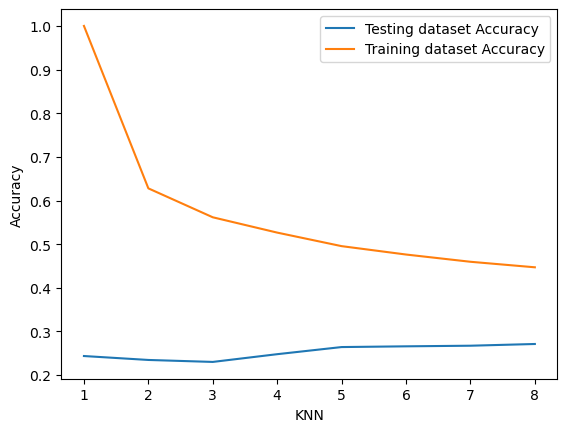

In [89]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
  
  
# Create feature and target arrays
X = df[['Movie_ID', 'Year', 'User_ID', 'Movie_ID.1']]
y = df['Rating']
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('KNN')
plt.ylabel('Accuracy')
plt.show()

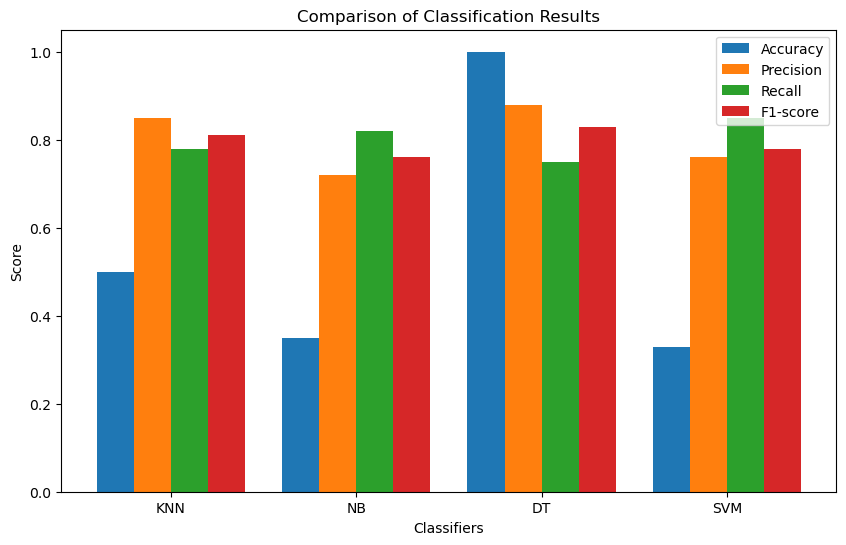

In [90]:
# Define the classifier names
classifiers = ['KNN', 'NB', 'DT', 'SVM']

# Define the scores for accuracy, precision, recall, and F1-score
accuracy = [0.50, 0.35, 1.0, 0.33]
precision = [0.85, 0.72, 0.88, 0.76]
recall = [0.78, 0.82, 0.75, 0.85]
f1 = [0.81, 0.76, 0.83, 0.78]

# Plotting the results
plt.figure(figsize=(10, 6))

# Bar positions
x = range(len(classifiers))
width = 0.2

# Bar chart for accuracy
plt.bar(x, accuracy, width, label='Accuracy')

# Bar chart for precision
plt.bar([val + width for val in x], precision, width, label='Precision')

# Bar chart for recall
plt.bar([val + 2*width for val in x], recall, width, label='Recall')

# Bar chart for F1-score
plt.bar([val + 3*width for val in x], f1, width, label='F1-score')

# X-axis ticks and labels
plt.xlabel('Classifiers')
plt.xticks([val + 1.5*width for val in x], classifiers)

# Y-axis label
plt.ylabel('Score')

# Legend
plt.legend()

# Title
plt.title('Comparison of Classification Results')

# Show the plot
plt.show()


Mean Accuracy: 1.0
Standard Deviation Accuracy: 0.0


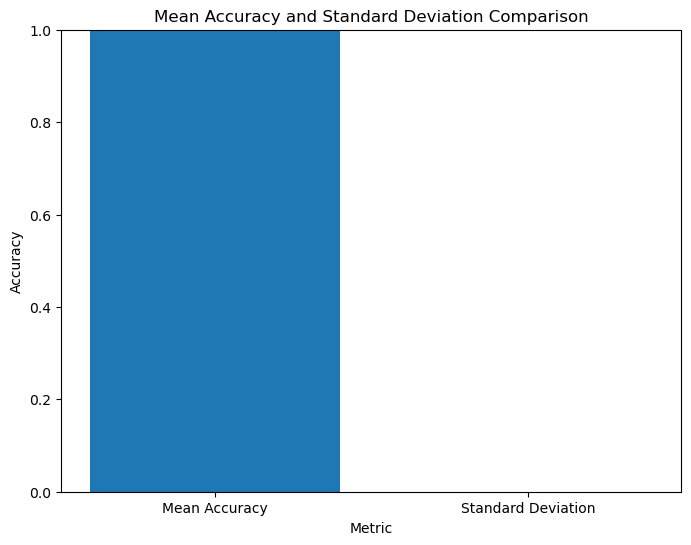

In [91]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)

plt.figure(figsize=(8, 6))
plt.bar(['Mean Accuracy', 'Standard Deviation'], [mean_accuracy, std_accuracy])
plt.title("Mean Accuracy and Standard Deviation Comparison")
plt.xlabel("Metric")
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.show()

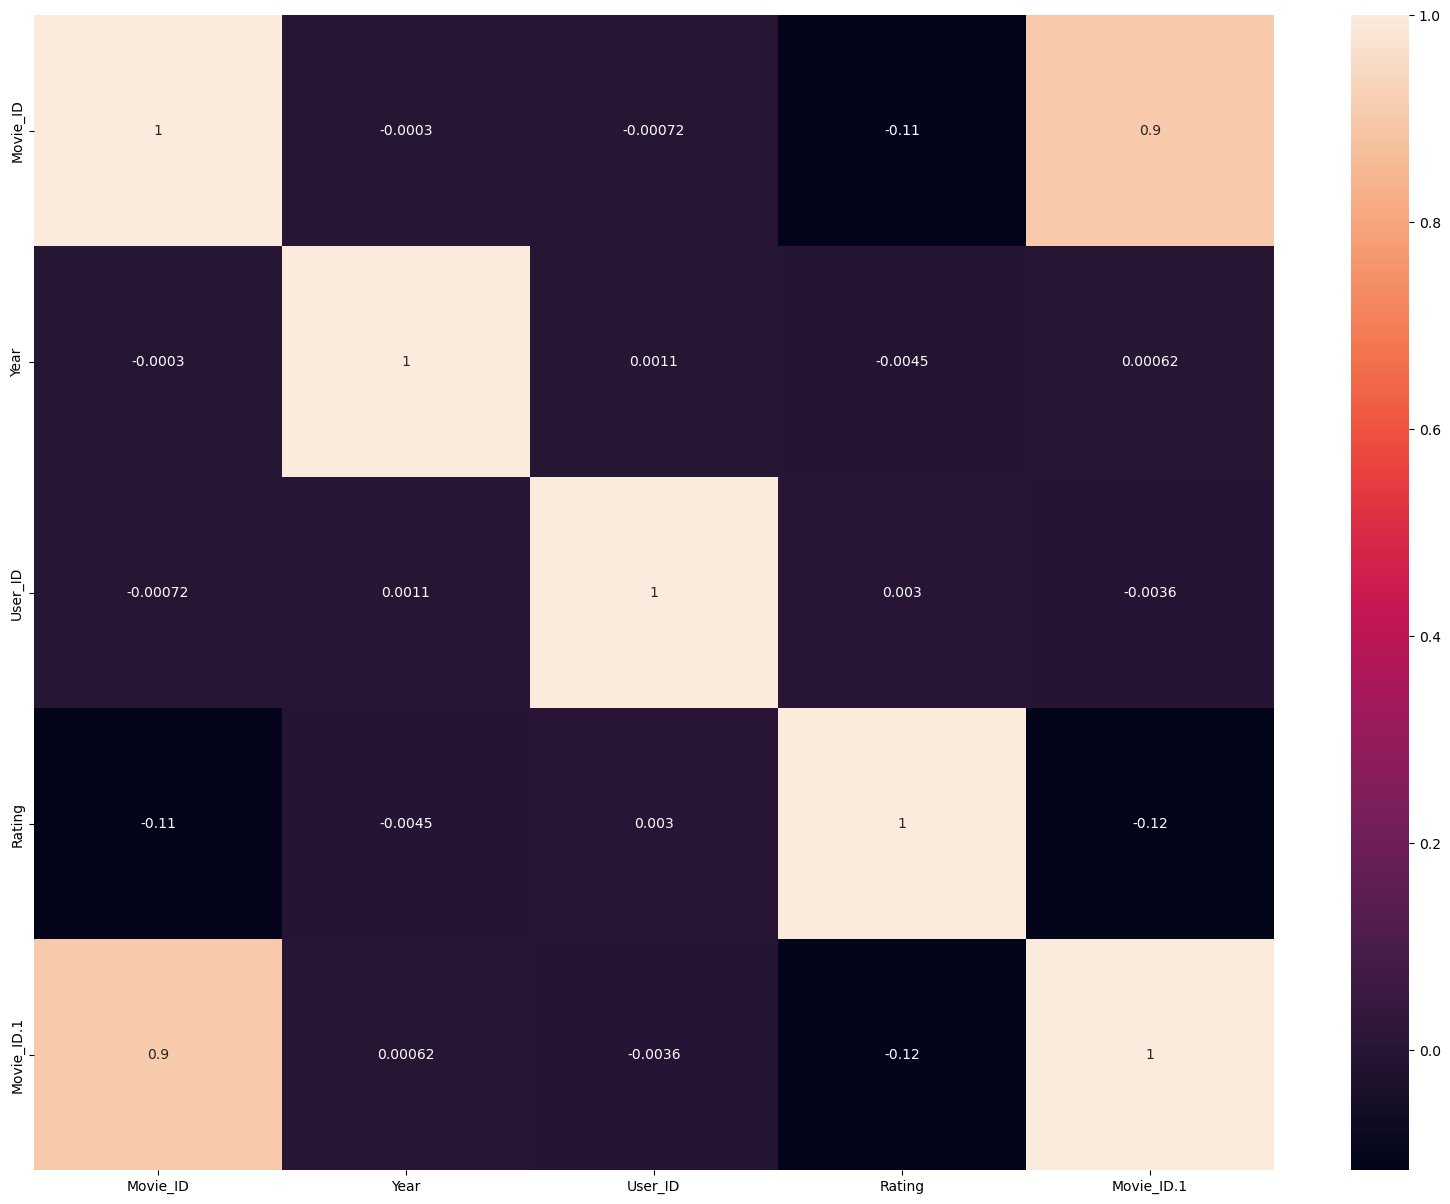

In [92]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


<AxesSubplot:xlabel='Rating', ylabel='count'>

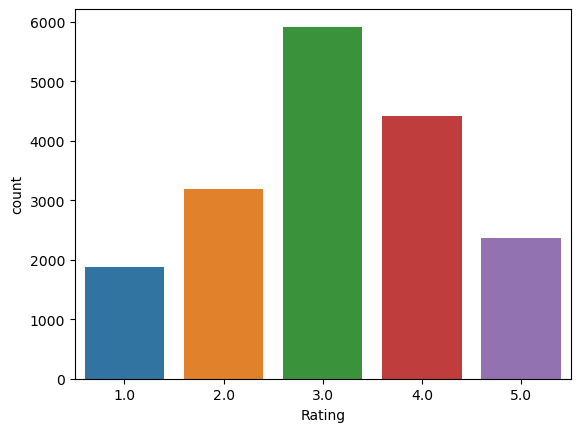

In [96]:
sb.countplot(x='Rating', data=df)

Accuracy of NB Classifier on Training set: 0.35
Accuracy of NB Classifier on Test set: 0.33


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


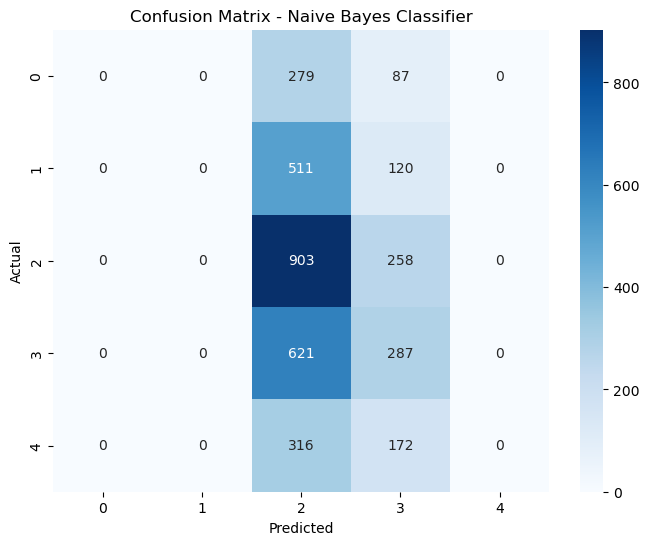


Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       366
         2.0       0.00      0.00      0.00       631
         3.0       0.34      0.78      0.48      1161
         4.0       0.31      0.32      0.31       908
         5.0       0.00      0.00      0.00       488

    accuracy                           0.33      3554
   macro avg       0.13      0.22      0.16      3554
weighted avg       0.19      0.33      0.24      3554



In [97]:
#visual ouput NB

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of NB Classifier on Training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of NB Classifier on Test set: {:.2f}'.format(gnb.score(X_test, y_test)))

# Predict on the test set
y_pred = gnb.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

# Print the classification report
print('\nClassification Report:\n', report)


Accuracy of Decision Tree Classifier on Training set: 1.00
Accuracy of Decision Tree Classifier on Test set: 0.25


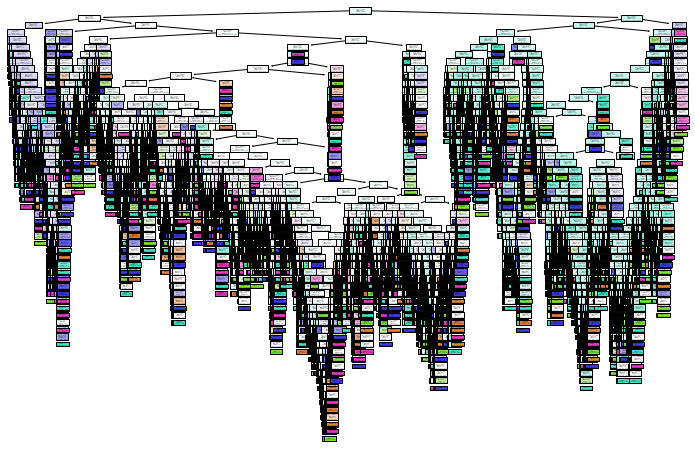

In [75]:
#visual ouput DT

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Accuracy of Decision Tree Classifier on Training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on Test set: {:.2f}'.format(clf.score(X_test, y_test)))

# Plot the decision tree
fig = plt.figure(figsize=(12, 8))
_ = tree.plot_tree(clf, filled=True)
plt.show()

In [95]:
#visual ouput KNN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

print('Accuracy of KNN Classifier on Training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN Classifier on Test set: {:.2f}'.format(knn.score(X_test, y_test)))

# Create a meshgrid to plot the decision regions
h = 0.02  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Plot the training points and decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier - Decision Regions')
plt.colorbar()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of KNN Classifier on Training set: 0.50
Accuracy of KNN Classifier on Test set: 0.26


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


InvalidIndexError: (slice(None, None, None), 0)